In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [15]:
df = pd.read_csv('08-01.csv',encoding='gbk').loc[9:49,['8-1  对外经济和旅游','Unnamed: 1','Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7']]


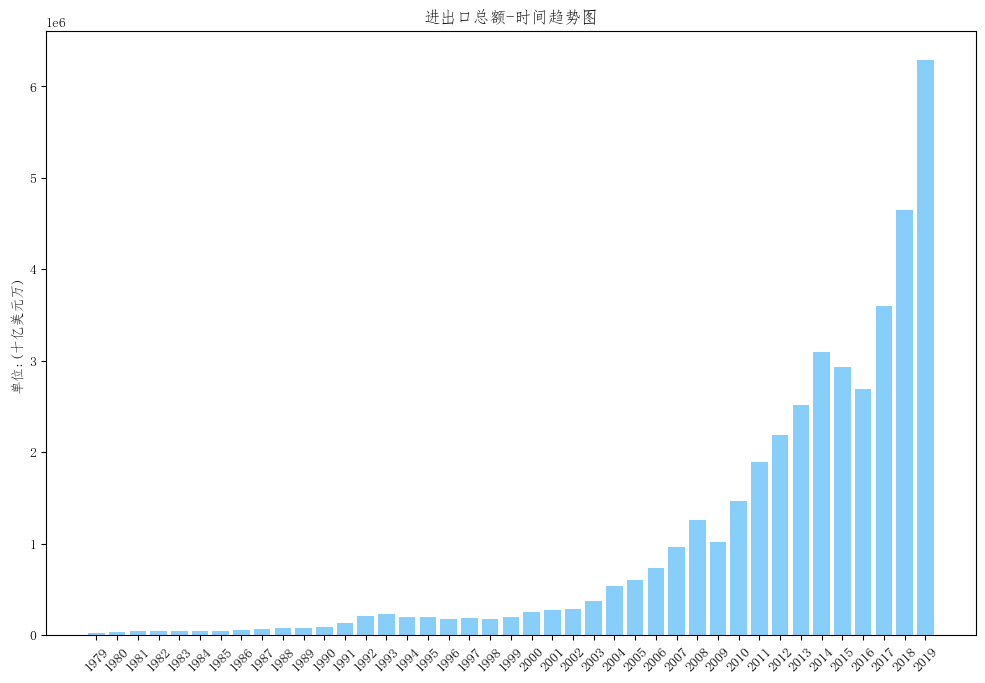

In [5]:
#生成x,y轴的数据
list_time = []
for i in df['8-1  对外经济和旅游']:
    list_time.append(i)

list_sum = []
for i in df['Unnamed: 1']:
    list_sum.append(int(i))
#设置画布的大小
plt.figure(figsize=(12,8),dpi=100)
#让x轴的内容45度旋转
plt.xticks(rotation=45)
#设置y轴的label
plt.ylabel('单位:(十亿美元万)')
#画柱状图
plt.bar(list_time,list_sum,color='LightSkyBlue')
#设置标题
plt.title('进出口总额-时间趋势图')
#显示图片
plt.show()
'''根据csv表的内容，这是一个历史趋势表，记录了从1979年的对外经济贸易的总值到2019年的对外经济贸易总值，
那么第一时间想到的就是怎么用一个图形，把这些内容显示出来，来看一个整的历史趋势呢，那么最好的方法就是将数据生成一个直方图，
这个图形是最能满足我们的想法，做这个图形，首先要确定两个内容，一个x轴坐标，一个y轴坐标，x轴坐标选用的是时间，对应的y轴坐标，
就是对应每一年的进出口贸易总额，做好一个基本图形之后，我们再对图像进行修改美好，使得符合我们的要求，最后从得到的图形来看，
是成一个正向比例，总体处于一个增长趋势'''

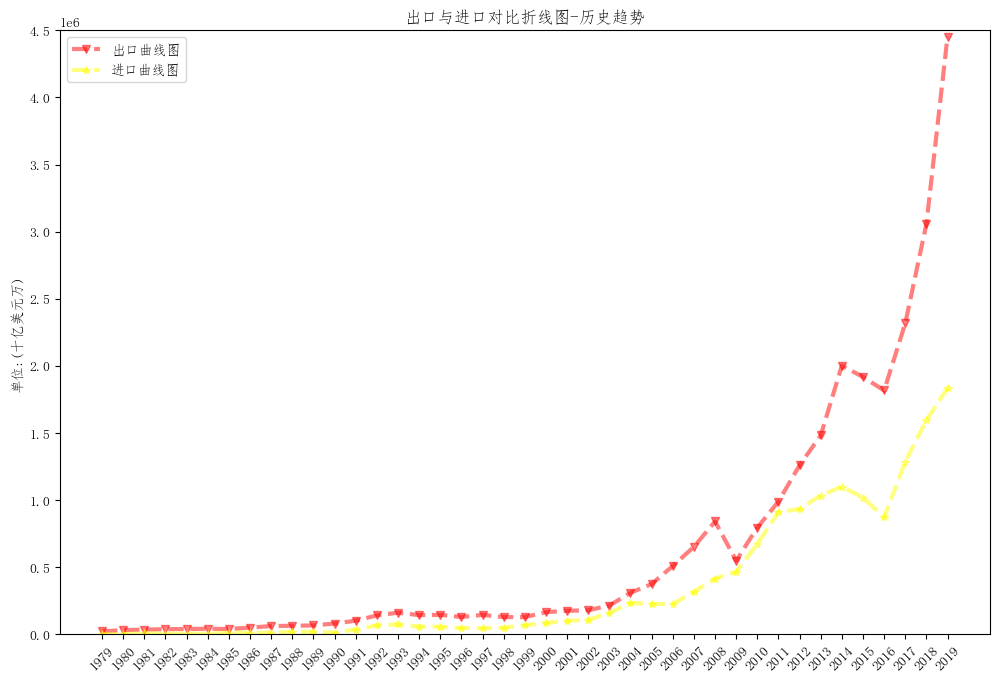

In [6]:
list_export = []
for i in df['Unnamed: 2']:
    list_export.append(int(i))

list_import = []
for i in df['Unnamed: 3']:
    list_import.append(int(i))
plt.figure(figsize=(12,8),dpi=100)
plt.xticks(rotation=45)
#设置y轴刻度
plt.ylim(0,4500000)
#曲线的函数
plt.plot(list_time,list_export,color= 'red',alpha = 0.5,linestyle='--',linewidth=3,marker='v',label='出口曲线图')
plt.plot(list_time,list_import,color= 'yellow',alpha = 0.5,linestyle='--',linewidth=3,marker='*',label='进口曲线图')
plt.ylabel('单位:(十亿美元万)')
plt.legend()
plt.title('出口与进口对比折线图-历史趋势')
plt.show()
'''对比完上面的图形之后，知道了我国经济发展一直都是处于一个良好的发展阶段，总体都是以增长的趋势往上走，看完了进出口贸易总额，那么我也想知道
进口和出口的对比图，这样方便看出我们是出口大于进口，还是进口大于出口呢，想到了这里，既然是用两个参照物来对比的话，那么折线图是最好的
对比工具了，和上面的步骤一样，将获取到的y值和x值，添加到我们的图像里面，这里因为是两个值对比，所以我们还要在plot再添加多一组数据，
才形成下面的图像，我们还得设置y轴的刻度，使得刻度一致，这样可以更好的对比出二者的差异，由图可知，我国对外贸易一直都是出口大于进口，
表明我国一直处于贸易顺差，我国对外贸易一直处于一个较为有利的地位'''

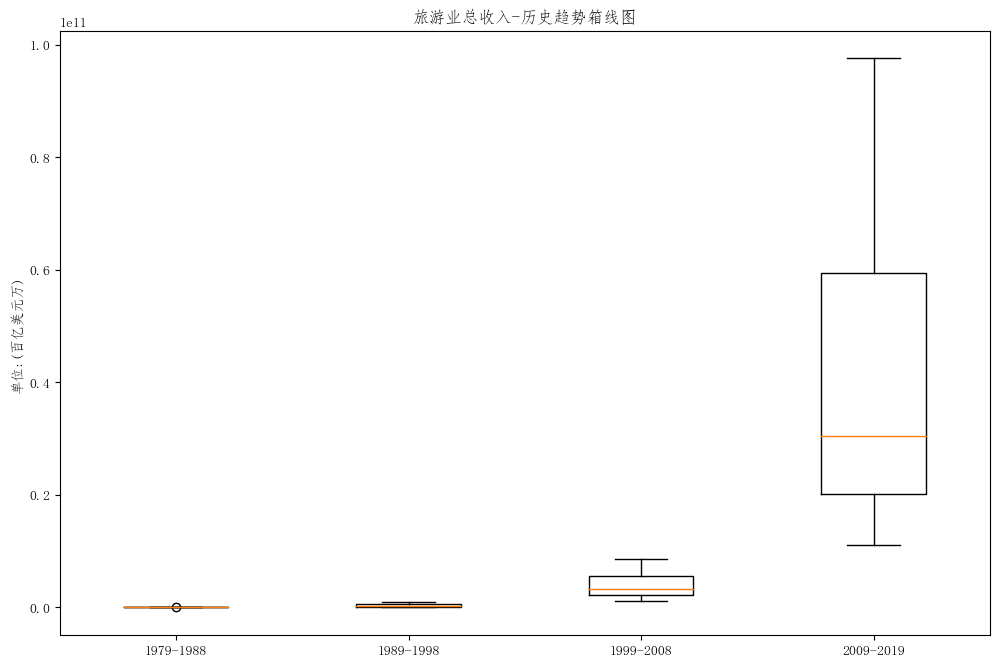

In [7]:
list_tourism = []
for i in df['Unnamed: 6']:
    i = float(i) * 10000000
    i = int(i)
    list_tourism.append(i)

#将获取到的数据进行一个分组，10年一个小组
y_data = [list_tourism[0:10],list_tourism[10:20],list_tourism[20:30],list_tourism[30:41]]
x_data = ['1979-1988','1989-1998','1999-2008','2009-2019']
plt.figure(figsize=(12,8),dpi=100)
plt.ylabel('单位:(百亿美元万)')
plt.title('旅游业总收入-历史趋势箱线图')
plt.boxplot(y_data, labels=x_data)
plt.show()
'''对比完对外贸易之后，我们回过头来看看我们的旅游业的发展趋势，这里我们将数据划分为4组，用箱线图来表示我们的旅游业发展，
首先箱线图中间那条线代表的是数据的中位数，而箱子的上下限，分别是数据的上四分位数和下四分位数，
因此，箱子的宽度在一定程度上反映了数据的波动程度，箱子越宽说明数据波动也就越大，在1979年到1998年的时候，箱线图几乎是一条线，
说明这二十年内，我国的旅游业发展较慢，也反应了当时人们生活水平不高，直到1999年开始，我国的旅游业才有了一定的气色，这时也是我们国经济
在快速发展的阶段，到了2009年开始，旅游业飞快发展，反应我国这时候经济正在以一个飞快的趋势向上发展，人们的生活水平得到了显著的提升'''

In [13]:
list_add= []
for l in range(len(list_sum)):
    add = (list_sum[l] - list_sum[l-1]) / list_sum[l-1]
    add = '{:.2f}'.format(float(add))
    list_add.append(add)

list_add[0] = '0'

df['进出口贸易增长比例(单位:100%)'] = list_add
print(df)
'''这时整一个csv文件我们也分析的差不多了，我们再去从这个表中看看能不能挖掘出一些有用的信息提供给我们参考，
我们想知道每一年的增长比例是怎么样的，尽管通过上面的直方图我们已经知道了这个是正增长，但是由于数据太大，不能很好的反映出每一年的增长比例
是怎么样的，因此我们需要自己去计算出这个增长的比例，我们用今年的减去上一年的再除以上一年的，这样我们就可以知道了每一年的增长比例，通过计算
我们得出的新的一列的数据，从这一列数据中，也会有负增长的，尽管非常的小，但是还是有点出乎我们的意料，
不过总体的趋势还是以每年增长30%-40%为主，说明我国经济一直处于一个良好的上升阶段'''

   8-1  对外经济和旅游 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
9          1979      23363      22296       1067        NaN       0.81   
10         1980      32635      31389       1246        NaN       0.95   
11         1981      43531      35504       8027        NaN       1.33   
12         1982      42662      38369       4293        NaN       1.53   
13         1983      45667      40003       5664        NaN       1.99   
14         1984      46171      41703       4468        NaN       2.63   
15         1985      52549      39606      12943        NaN       3.20   
16         1986      62377      50305      12072        NaN       4.12   
17         1987      74642      61945      12697        235       5.72   
18         1988      83403      63860      19543        447       6.76   
19         1989      85201      66563      18638       1495       5.57   
20         1990      94161      80552      13609       1116       8.52   
21         1991     137525     101665 